## SECOM – Principal Component Analysis (PCA)

In this phase, we will perform a basic principal component analysis. Principal Component Analysis (PCA) is a natural next step to address redundancy. PCA shows that a small subset of principal components captures most of the dataset variance, reducing dimensionality while preserving information.

### Key Steps:

1. **Standardize features**

2. **Apply PCA**

3. **Plot cumulative explained variance**


By projecting correlated features into a smaller set of orthogonal principal components, PCA captures the maximum variance in fewer dimensions while reducing noise. This step preserves the underlying structure of the data, enabling more effective classification of the Pass/Fail target.


Import libraries

In [12]:
import importlib.util
import sys
from pathlib import Path

# CHANGE THIS PATH to where dpf.py actually lives
dpf_path = Path("G:\\GitHub\\SECOM-Process-Sensor-Analysis\\dpf.py")

spec = importlib.util.spec_from_file_location("dpf", dpf_path)
dpf = importlib.util.module_from_spec(spec)
sys.modules["dpf"] = dpf
spec.loader.exec_module(dpf)

# Now test
dpf.Check


<function dpf.Check(df)>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import dpf
from sklearn.decomposition import PCA

Load cleaned data

In [14]:
cleaned_df = pd.read_csv("secom_cleaned.csv")

Drop non-numeric columns for EDA (e.g., Timestamp, Pass/Fail for now)

In [15]:
numeric_df = cleaned_df.select_dtypes(include='number')

In [16]:
dpf.Check(numeric_df)

Initating Data Checking Process...
Shape of the DataFrame:
Shape: 1567 rows, 475 columns

               Dtype  Missing  Missing %  Unique
Feature_1    float64        0        0.0    1520
Feature_2    float64        0        0.0    1505
Feature_3    float64        0        0.0     507
Feature_4    float64        0        0.0     518
Feature_5    float64        0        0.0     503
...              ...      ...        ...     ...
Feature_587  float64        0        0.0     322
Feature_588  float64        0        0.0     260
Feature_589  float64        0        0.0     120
Feature_590  float64        0        0.0     612
Pass/Fail      int64        0        0.0       2

[475 rows x 4 columns]

First 5 rows:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_7  \
0   0.224463   0.849523  -0.436430   0.035804  -0.050121  -0.564354   
1   1.107287  -0.383106   1.016977   0.155282  -0.059585   0.197639   
2  -1.114000   0.798901  -0.481447   0.688278  -0.047447  -0.906768   

,Dtype,Missing,Missing %,Unique
Feature_1,float64,0,0.0,1520
Feature_2,float64,0,0.0,1505
Feature_3,float64,0,0.0,507
Feature_4,float64,0,0.0,518
Feature_5,float64,0,0.0,503
...,...,...,...,...
Feature_587,float64,0,0.0,322
Feature_588,float64,0,0.0,260
Feature_589,float64,0,0.0,120
Feature_590,float64,0,0.0,612


Standardize features

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

Apply PCA

In [18]:
pca = PCA()
pca.fit(X_scaled)

,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",None
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",False
,"svd_solver svd_solver: {'auto', 'full', 'covariance_eigh', 'arpack', 'randomized'}, default='auto'""auto"" : The solver is selected by a default 'auto' policy is based on `X.shape` and `n_components`: if the input data has fewer than 1000 features and more than 10 times as many samples, then the ""covariance_eigh"" solver is used. Otherwise, if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ""randomized"" method is selected. Otherwise the exact ""full"" SVD is computed and optionally truncated afterwards.""full"" : Run exact full SVD calling the standard LAPACK solver via `scipy.linalg.svd` and select the components by postprocessing""covariance_eigh"" : Precompute the covariance matrix (on centered data), run a classical eigenvalue decomposition on the covariance matrix typically using LAPACK and select the components by postprocessing. This solver is very efficient for n_samples >> n_features and small n_features. It is, however, not tractable otherwise for large n_features (large memory footprint required to materialize the covariance matrix). Also note that compared to the ""full"" solver, this solver effectively doubles the condition number and is therefore less numerical stable (e.g. on input data with a large range of singular values).""arpack"" : Run SVD truncated to `n_components` calling ARPACK solver via `scipy.sparse.linalg.svds`. It requires strictly `0 < n_components < min(X.shape)`""randomized"" : Run randomized SVD by the method of Halko et al... versionadded:: 0.18.0.. versionchanged:: 1.5 Added the 'covariance_eigh' solver.",'auto'
,"tol tol: float, default=0.0Tolerance for singular values computed by svd_solver == 'arpack'.Must be of range [0.0, infinity)... versionadded:: 0.18.0",0.0
,"iterated_power iterated_power: int or 'auto', default='auto'Number of iterations for the power method computed bysvd_solver == 'randomized'.Must be of range [0, infinity)... versionadded:: 0.18.0",'auto'
,"n_oversamples n_oversamples: int, default=10This parameter is only relevant when `svd_solver=""randomized""`.It corresponds to the additional number of random vectors to sample therange of `X` so as to ensure proper conditioning. See:func:`~sklearn.utils.extmath.randomized_svd` for more details... versionadded:: 1.1",10
,"power_iteration_normalizer power_iteration_normalizer: {'auto', 'QR', 'LU', 'none'}, default='auto'Power iteration normalizer for randomized S

Plot cumulative explained variance

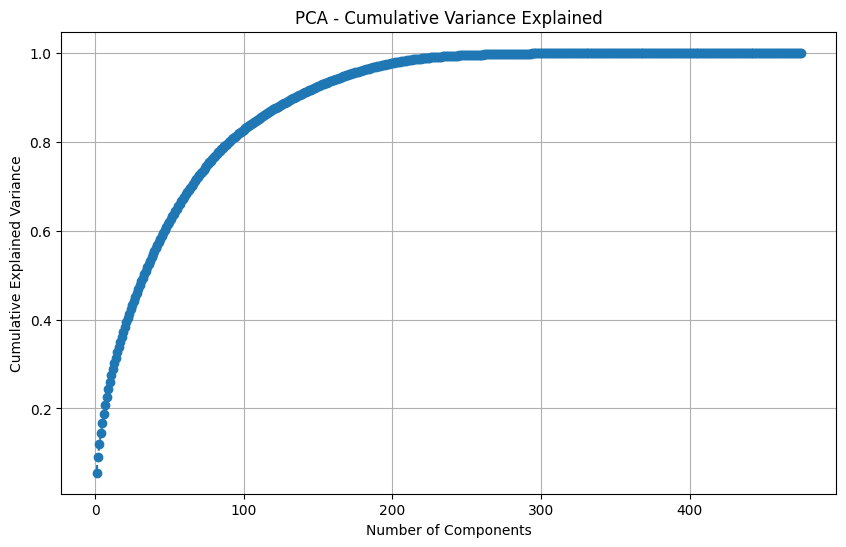

In [19]:
''' This snippet plots the cumulative explained variance to help determine the number of components to keep.
Use this plot by eye-balling the "elbow" point where adding more components yields diminishing returns in explained variance.
After determining the number of components, you can re-run PCA with that number for dimensionality reduction. '''


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(),
         marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Variance Explained")
plt.grid(True)
plt.show()

In [21]:
# Define pca_80 if not already defined
if 'pca_80' not in locals():
    pca_80 = PCA(n_components=80)
    pca_80.fit(X_scaled)

In [22]:
# Based on the plot, we decide to keep 80 components
pcs = pca_80.fit_transform(X_scaled)
pca_80_df = pd.DataFrame(pcs, columns=pc_cols, index=numeric_df.index)
# If 'Pass/Fail' column exists, add it back to the PCA DataFrame
if 'Pass/Fail' in numeric_df.columns:
    pca_80_df['Pass/Fail'] = numeric_df['Pass/Fail']
# Save the PCA-transformed DataFrame to a CSV file
pca_80_df.to_csv("secom_pca80.csv", index=True)
pca_80_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,Pass/Fail
0,-1.695199,2.917405,3.892544,-2.590088,-0.009864,-1.314394,-1.766956,1.794744,0.116188,-1.560492,...,0.797982,0.540964,1.348365,-2.787982,0.008314,0.873953,0.858460,1.754546,0.637307,-1
1,-2.248348,0.873219,2.881781,-2.065338,-0.299747,-1.631512,-2.220765,1.265237,1.668883,-2.951192,...,1.645364,-0.726956,-0.855292,1.920564,-0.215054,1.528389,1.660718,-2.114449,0.921746,-1
2,0.471732,1.363829,1.129737,-0.411975,0.583823,2.072127,-2.200386,0.379427,0.717361,-2.832273,...,-3.697530,-2.697661,2.566267,-2.147573,2.447071,-4.847765,-0.205266,2.003179,-0.203437,1
3,1.160894,5.131574,4.273501,-3.292866,2.816113,2.045203,-7.915794,-2.386358,-11.360841,-6.091558,...,-1.259733,0.907275,-3.132070,-0.594622,0.066477,-2.406564,0.786462,-1.384767,-1.393585,-1
4,0.752969,2.366789,2.542772,0.013289,1.990495,3.420172,-4.565695,-0.943414,-3.606782,2.415105,...,5.013390,-0.503387,4.523885,0.130186,0.058046,1.189228,-1.127076,-2.476603,-1.945900,-1
